# Exploratory Analysis For Online News Popularity - A deep insight analysis

- by [Ayo Ayibiowu](https://www.linkedin.com/in/ayoayibiowu/)

In this project, the goal is the explore the dataset given and be able to find critical insights that can be used to influence potential article popularity. Also, machine learning models was built to be able to predict the popularity of a given article. 

The process followed is highlighted below:
 - Data Cleaning - Noise detection and removal
 - Subjective analysis - Using our intuition to evaluate a data variable/feature and decide whether a variable influences the popularity of the article or not.
 - Quantitative Analysis - How correct is our intuition? Here we carry our several analysis to accept or debunk our initial hypothesis
 - Normal Distribuiton Observation on the dataset
 - Feature Selection and Evaluation
 - Machine Learning Classification
 - Summary and Conclusion. 
 


In [ ]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

## Open Book - Ideas to consider

Some ideas to consider
 - What is the effect of number of images/number of videos on the article popularity?
 - Is their a relationship between the number of words in the content and/or  
 number of words in the title in the article popularity
 - Is their a concrete relationship between average length of words in the content to the popularity
 - Create a grading/rank for the popularity: Excellent, Good, Okay, Poor, Very Poor
 - How is the ranking of the channels in regards to the shares popularity
 - What data channel has the most popularity and what feature in that particular data channel
 contributes towards that asserction. Is this also observed in the other data channels?
 - What about the effects of the Worst, Best, and Avg keywords
 
 - Is their an influence on the min, max or avg shares on each article referenced articles. Does
 the number of shares in those referenced articles also influence the number of shares in the main
 article?
 
 - At what point in the weekend do people share articles the most? Can that means people read those
 articles the most on those days?
 
 - What is the effect of LDA analysis on the article popularity
 
 - Does article with more text sentiment influence the popularity
 
 - what the is relationship between the text sentiment and the article publish day? Are more sentiment 
 on a particlar day?
 
 - How about the influence of postive/negative words in the text sentiment and popularity. Do people
 favours postive worded article. What is ratio of postive to negative word articles in the dataset? 
 Are the mutually balanced and can we make a judgment based on that alone?
 
 - What about the effect of subjectivity on the title and test in the popularity
 

## Reading the data

In [ ]:
data = pd.read_csv("/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
data.head(n=4)
origianl_data = copy(data)
data.columns



# Data Processing


In [ ]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
data.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
data.head(n=4)

In [ ]:
# describing the data
data.describe()
# from the data, there will be need to normailze the data if their will be need for condersing any machine learning model.

In [ ]:
# creating a grading criteria for the shares
share_data = data[' shares']
data[' shares'].describe()

## Grading the Shares

* Exceptional = Top 95%
* Excellent = Top 90%
* Very Good = Top 80%
* Good = Top 60%
* Average = Top 50%
* Poor = Top 35%
* Very Poor = Rest


In [ ]:
# create label grades for the classes
share_label = list()
for share in share_data:
    if share <= 645:
        share_label.append('Very Poor')
    elif share > 645 and share <= 861:
        share_label.append('Poor')
    elif share > 861 and share <= 1400:
        share_label.append('Average')
    elif share > 1400 and share <= 31300:
        share_label.append('Good')
    elif share > 31300 and share <= 53700:
        share_label.append('Very Good')
    elif share > 53700 and share <= 77200:
        share_label.append('Excellent')
    else:
        share_label.append('Exceptional')

# Update this class label into the dataframe
data = pd.concat([data, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
data.head(4)


In [ ]:
# Merging the weekdays columns channels as one single column
publishdayMerge=data[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=data[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [ ]:
# merge the the new data into the dataframe
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now I drop the old data
data.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data.head(n=4)

In [ ]:
data.columns

### Here we check the class balance


In [ ]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=data,alpha=0.5)


In [ ]:
# Fetch the counts for each class
class_counts = data.groupby('popularity').size().reset_index()
class_counts.columns = ['Popularity','No of articles']
class_counts


## Data Visualization 
Evaluating our hypothesis


In [ ]:
# Visualizaing the "low" expectation hypothesis
# n_non_stop_words
print(data[' n_non_stop_words'].describe())
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
data = data[data[' n_non_stop_words'] != 1042]
# Here, we will go ahead and drop the field of ' n_non_stop_words'
data.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)


### Noise Removal
 - We observed some noise from the dataset coming from different features. 
 

In [ ]:
# remove noise from n_tokens_content. those equals to 0
data  = data[data[' n_tokens_content'] != 0]
print ("After noise removal - ",data.shape)

In [ ]:
# n_non_stop_unique_tokens
data[' n_non_stop_unique_tokens'].describe()
# a lot of unique words, it is better to use a different plot from bar plots
# line plot
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(10,10))
# box plot
sns.boxplot(x='popularity', y=' n_non_stop_unique_tokens', data=data, ax=axes)
# box plot of the dataset shows majority (75%) of the data inrespective of their shares is in the range of 0.6 - 0.8.
# So does it offers any uniques? No, it doesn't.

In [ ]:
#kw_min_min and related kw_ terms
data[' kw_min_min'].describe()
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', 
            ' kw_max_avg', ' kw_avg_avg', ' shares']
# run a pairplot
#sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')


In [ ]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the these terms
kw_cols = [' rate_positive_words', ' rate_negative_words', ' global_rate_positive_words', ' global_rate_negative_words', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

'''
There is a linear relationship between rate_positive_words and rate_negative_words (it is expected)
rate_positive_words = No special relationship or observable trait was observed for this variable. Although most of articles tends 
to be on falls towards the 0.3 - 1
rate_negative_words = No special relationship or observable trait was observed for this variable. Although most of articles tends 
to be on falls towards the 0.8 - 0 = Note the articles with popularity less than "average" have the lowest negative score rate.
global_rate_positive_words - There is a slight relationship with shares. - Medium
global_rate_negative_words - There is a slight relationship with shares. - Medium

'''

In [ ]:
# attempt polartiy
temp_data = data[data[' shares'] <= 100000]
sns.lmplot(x=' avg_positive_polarity', y=' shares', col='popularity', data=temp_data)

In [ ]:
# attempt polartiy
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(10,10))
sns.scatterplot(x=' avg_positive_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)

In [ ]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the terms
kw_cols = [' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

'''
avg_positive_polarity and avg_negative_polarity are good features with some clear observation 
'''

In [ ]:
# attempt title_subjectivity
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x=' title_sentiment_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)

In [ ]:
# attempt title_subjectivity
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.relplot(x=' title_subjectivity', y=' shares', hue='popularity', data=temp_data, ax=axes)

In [ ]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' title_sentiment_polarity', ' abs_title_sentiment_polarity', ' title_subjectivity', ' abs_title_subjectivity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

### Evaluating Expectations

In [ ]:
# attempt self_reference_min_shares
temp_data = data[(data[' shares'] <= 100000) & (data[' self_reference_min_shares'] <= 30000)]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x=' self_reference_min_shares', y=' shares', hue= 'popularity', data=temp_data, ax=axes)

In [ ]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

In [ ]:
#### LDA - 0: 5
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

#### Weekdays Variable Effect


In [ ]:
# extact the weekdays articles distrubution
weekdays_data = data.groupby('weekdays').size().reset_index()
weekdays_data.columns = ['weekdays','count']
weekdays_data

In [ ]:
# shows the days when articles are usually posted
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='weekdays',data=data,alpha=0.5, ax=axes)

In [ ]:
# shows relationship with the number of shares and the weekdays
temp_data = data[(data['popularity'] == 'Very Poor') | (data['popularity'] == 'Poor') | (data['popularity'] == 'Average') | (data['popularity'] == 'Good')]
ax = sns.catplot(x='weekdays', col="popularity", data=temp_data, kind="count", height=10, aspect=.7)

In [ ]:
# shows relationship with the number of shares and the weekdays (compare only the best three popularity)
temp_data = data[(data['popularity'] == 'Exceptional') | (data['popularity'] == 'Excellent') | (data['popularity'] == 'Very Good')]
ax = sns.catplot(x='weekdays', col="popularity", data=temp_data, kind="count", height=20, aspect=.7)

'''
'''

It seems the best popular articles are usually posted on Mondays and Wednesday (and a bit of tuesdays)
Sundays and Saturdays (Weekends generally) are the worsts days to publish an articles. Your chances are low


In [ ]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' average_token_length', ' num_keywords', ' global_subjectivity', ' global_sentiment_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

#### Data Channel Evaluation
Here, it can be seen that the best articles with highest share popularity belongs to the "Others" channel. For a more concrete channel,
The "Business" and "Entertaiment" channel are great for the best popularity. Coming in third position will be the "World" and "Tech". 
Tech channels performed generally okay. 
One important observation is also that "Entertaiment" channel based articls seems to be persistent in all popularity types. Meaning they might
not always be the best channel to publish for. 

In [ ]:
## Seeing the distribution of the articles across the data channels
# extact the weekdays articles distrubution
data_channel_data = data.groupby('data_channel').size().reset_index()
data_channel_data.columns = ['Data Channels','No of articles']
data_channel_data


In [ ]:
# Shows the distribution of the articles across the channels
sns.catplot(x='data_channel', data=data, kind="count", height=10, aspect=.7)

In [ ]:
#the ranking of the channels in regards to the shares popularity
temp_data = data[(data['popularity'] == 'Very Poor') | (data['popularity'] == 'Poor') | (data['popularity'] == 'Average') | (data['popularity'] == 'Good')]
ax = sns.catplot(x='data_channel', col="popularity", data=temp_data, kind="count", height=8, aspect=.7)

In [ ]:
# shows relationship with the number of shares and the ranking of the channels (compare only the best three popularity)
temp_data = data[(data['popularity'] == 'Exceptional') | (data['popularity'] == 'Excellent') | (data['popularity'] == 'Very Good')]
ax = sns.catplot(x='data_channel', col="popularity", data=temp_data, kind="count", height=10, aspect=.7)


### Evaluating the Observerd Hypothesis

#### Data channels vs Num_images vs popularity
Here we compared data channels impact with num images in regards to article popularity - 
Earlier we said, good articles tend to have high visuals (num_images) in them but it is not always the case everytime. 
Those rare cases where the high visuals or low visuals doesn't change anything is in the Business channel. From the plot below,
we can see that Business channels generally don't get influnece by the num_images in them. They are generally low inrespective of the popularity.
This is peculiar pattern. 
Entertainment channels generally tend to have high visuals as their popularity increases, with the only exception in 'Average' popularity.


In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = data[data[' num_imgs'] <= 25]
sns.boxplot(x='popularity',y=' num_imgs', hue='data_channel', data=temp_data, showfliers=False)

# Making Recommendations For Good Articles
 - n_tokens_content should be less than 1500 words. The lesser the better.
 - n_tokens_title should be between 6 - 17 words. 
 - n_unique_tokens should be between 0.3 - 0.8
 - num_hrefs is between 1 and 40 referrence links
 - num_imgs should between 1 - 40 images
 - num_videos should be between 0 - 25 vidoes. The higher the lower the odds.
 - average_token_length should be between 4 - 6
 - The number of keywords in the metedata really influences the shares to a margin. The higher the value the better the shares chances. A value upward of 5 is recommend.
 - Here, it can be seen that the best articles with highest share popularity belongs to the "Others" channel. For a more concrete channel, The "Business" and "Entertaiment" channel are great for the best popularity. Coming in third position will be the "World" and "Tech".
 - Best popular articles are usually posted on Mondays and Wednesday (and a bit of tuesdays). Sundays and Saturdays (Weekends generally) are the worsts days to publish an articles. 
 - Articles that talks about current trending are better for shares

> > From the scatterplot below, it can be seen than good articles will generally tend to have n_tokens_content less than 2000 and greater than 100 words

In [ ]:
#n_tokens_content
sns.scatterplot(x=' n_tokens_content',y='popularity', data=data)

> > From the scatterplot below, it can be seen than good articles will generally tend to have n_tokens_title between 6 and 17 words

In [ ]:
#n_tokens_title
temp_data = data[data[' shares'] <= 200000]
sns.scatterplot(x=' n_tokens_title',y=' shares', hue='popularity', data=temp_data)

>> similar to the above. 

In [ ]:
#n_tokens_title
temp_data = data[data[' shares'] <= 200000]
plt.figure(figsize=(10,10))
sns.scatterplot(x=' n_unique_tokens',y=' shares', hue='popularity', data=data)

In [ ]:
#num_hrefs
temp_data = data[data[' shares'] <= 100000]
sns.scatterplot(x=' num_hrefs',y=' shares', hue='popularity', data=temp_data)

In [ ]:
#num_imgs
temp_data = data[data[' shares'] <= 100000]
#plt.figure(figsize=(30,10))
#sns.barplot(x=' num_imgs',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' num_imgs', y=' shares', col='popularity', data=temp_data)

In [ ]:
#num_videos
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' num_videos'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
#sns.barplot(x=' num_imgs',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' num_videos', y=' shares', col='popularity', data=temp_data)

In [ ]:
#average_token_length
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' average_token_length'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' average_token_length',y=' shares', hue='popularity', data=temp_data)

In [ ]:
#num_keywords
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' num_keywords'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=temp_data)

In [ ]:
#self_reference_avg_sharess
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' self_reference_avg_sharess'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' self_reference_avg_sharess',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' self_reference_avg_sharess', y=' shares', col='popularity', data=temp_data)

 ## Normal Distribution analysis for 'Shares'
  - Normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics) and some machine learning models. We evaluated the impact of this normaility on our models

In [ ]:
print("Skewness: %f" % data[' shares'].skew())
print("Kurtosis: %f" % data[' shares'].kurt())


In [ ]:
from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = data[data[' shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data[' shares'], fit=norm);
fig = plt.figure()
res = probplot(data[' shares'], plot=plt)
'''
'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.
Thus some statistic analysis might not be suitable for it

'''

Although shares doesn't have a normal distrubition, we can do a log transformation to give us a normal distrubition data

In [ ]:
from copy import copy

In [ ]:
#applying log transformation
new_shares_data = copy(data)

new_shares_data.loc[new_shares_data[' shares'] > 0, ' shares'] = np.log(data.loc[data[' shares'] > 0, ' shares'])
new_shares_log = new_shares_data[' shares']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

In [ ]:
#Check for missing data
total = new_shares_data.isnull().sum().sort_values(ascending=False)
percent = (new_shares_data.isnull().sum()/new_shares_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

# Feature Extraction & Selection
 - Here we will be extracting some of the best features we observed out from the data. The below criteria will be considered:
  - Feature selection based on best hypothesis observed
  - Feature Selection on the whole dataset
  - Feature selection using fisher discriminal analysis
  - Feature selection based on the best hypothesis observed but with a normal distribution (log transformation)
  - Feature selection using fisher discriminate analysis on normal distribution dataset
  - Feature Selection on the whole dataset - Normal Distribution

#### Feature Selection on the whole dataset


In [ ]:
# shares data is not needed for classification
data_without_shares = data.drop(labels=[' shares'], axis = 1, inplace=False)

training_set = data_without_shares.iloc[:, :(data_without_shares.shape[1]-1)]
# convert categorical variables into dummy - it use one-hot encoding
training_set = pd.get_dummies(training_set)

# extract the label data in this case popularity
label_set = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):].values

data_feature2 = copy(training_set)

#### Feature selection based on best hypothesis observed

In [ ]:
# only the best observed features are extracted here
data_feature1 =training_set[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' num_hrefs',
                       ' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',
                       ' kw_avg_avg',' self_reference_avg_sharess',' global_subjectivity',
                       ' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' avg_positive_polarity',
                       ' avg_negative_polarity',' title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]

In [ ]:
data_feature1.columns

#### Feature Selection Based on Fisher Discrimating Analysis

In [ ]:
# helper function for evalating the fisher ndex
def fisher_index_calc(trainingSet, labelSet):
    (dim1_T, dim2_T) = trainingSet.shape
    (dim1_L, dim2_L) = labelSet.shape

    # create the fisher output variable - A vector of all the features
    fisher_ratios = np.zeros((1, dim2_T), dtype=float).flatten()
    # It's expected that the dim1_T and dim1_L be of the same size, else this input parameters is nulled.
    if dim1_L != dim1_T:
        return fisher_ratios

    # First extract out the number of features available.
    # grouped both data together, and create a pandas dataframe from it.
    train1 = pd.DataFrame(trainingSet)
    label1 = pd.DataFrame(labelSet, columns=['LABEL'])
    grouped = pd.concat([train1, label1], axis=1)

    # fetch the number of classes
    (no_classes, demo) = grouped.groupby('LABEL').count()[[0]].shape
    #print grouped

    # loop through all features
    for j in range(dim2_T):
        # the variance of the feature j
        j_variance = np.var(trainingSet[:,j])
        j_mean = np.mean(trainingSet[:,j])
        j_summation = 0
        for k in range(no_classes):
            output = grouped.groupby('LABEL').count()[[j]]
            k_feature_count = output.iloc[k,0]
            # mean for class k of feature j
            output = grouped.groupby('LABEL').mean()[[j]]
            k_feature_mean = output.iloc[k,0]
            currentSum = k_feature_count * np.square((k_feature_mean - j_mean))
            j_summation = j_summation + currentSum
        fisher_ratios[j] = j_summation / np.square(j_variance)

    return fisher_ratios

In [ ]:
# calculates the fisher score of the features
fisher_scores = fisher_index_calc(training_set.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features': fisher_scores})


In [ ]:
# plot the fisher analysis score
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [ ]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 3000:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
data_feature_fisher = training_set.drop(training_set.columns[to_remove], axis=1, inplace=False)
print ("fisher based features - ", data_feature_fisher.shape)
data_feature_fisher.columns

#### Finding the normal distrubution of the dataset

In [ ]:
# use log transformation to transform each features to a normal distribution
training_set_normal = copy(training_set)

# note log transformation can only be performed on data without zero value
for col in training_set_normal.columns:
    #applying log transformation
    temp = training_set_normal[training_set_normal[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        training_set_normal[col] = np.log(training_set_normal[col])
        print (col)
    else:
        # attempt to only transform the positive values alone
        training_set_normal.loc[training_set_normal[col] > 0, col] = np.log(training_set_normal.loc[training_set_normal[col] > 0, col])


#### Feature selection based on best hypothesis observed - Normal distribution


In [ ]:
# only the best observed features are extracted here
data_feature1_normal =training_set_normal[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' num_hrefs',
                       ' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',
                       ' kw_avg_avg',' self_reference_avg_sharess',' global_subjectivity',
                       ' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' avg_positive_polarity',
                       ' avg_negative_polarity',' title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]


#### Feature Selection Based on Fisher Discrimating Analysis - Normal Distribution


In [ ]:
# calculates the fisher score of the features
fisher_scores_normal = fisher_index_calc(training_set_normal.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features - Normal Distribution': fisher_scores_normal})
# plot the fisher analysis score
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [ ]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores_normal))):
    if fisher_scores_normal[i] < 1000:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
data_feature_fisher_normal = training_set_normal.drop(training_set_normal.columns[to_remove], axis=1, inplace=False)
# ihave about 25 features left.
print ("fisher based features : Normal distributions - ", data_feature_fisher_normal.shape)
data_feature_fisher_normal.columns

#### Feature Selection on the whole dataset - Normal Distribution


In [ ]:
data_feature2_normal = copy(training_set_normal)

## Visulazing the impact of normal distribution on the data
 In the new transformation, the features observation is more clear than before.


In [ ]:
temp_data_normal = pd.concat([training_set_normal, pd.DataFrame(new_shares_log, columns=[' shares'])], axis=1)
label_set6 = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):]
temp_data_normal = pd.concat([temp_data_normal, label_set6], axis=1)


In [ ]:
temp_data = temp_data_normal[temp_data_normal[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' average_token_length', ' num_keywords', ' n_tokens_title', ' global_sentiment_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data_normal, vars=kw_cols, hue='popularity', diag_kind='kde')

In [ ]:
#n_tokens_title
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=data, ax=axs[1])

In [ ]:
#n_tokens_content
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' n_tokens_content',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' n_tokens_content',y=' shares', hue='popularity', data=data, ax=axs[1])

In [ ]:
#title_subjectivity
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' title_subjectivity',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' title_subjectivity',y=' shares', hue='popularity', data=data, ax=axs[1])

### Variables of our features selection are listed below:
 - Feature selection based on best hypothesis observed - **data_feature1**
 - Feature Selection on the whole dataset - **data_feature2**
 - Feature selection using fisher discriminal analysis - **data_feature_fisher**
 - Feature selection based on the best hypothesis observed but with a normal distribution (log transformation) - **data_feature1_normal**
 - Feature selection using fisher discriminate analysis on normal distribution dataset - **data_feature_fisher_normal**
 - Feature Selection on the whole dataset - **data_feature2_normal** 



# Machine Learning - Supervised Learning Classification
 - Here, we are going to apply some machine learing models on our dataset for classifying an article popularity

In [ ]:
# normalizaling the data with standard scaler
# we will normalized all the features selections

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scalled all the feature selections
data_feature1_nor = scaler.fit_transform(data_feature1.values)
data_feature2_nor = scaler.fit_transform(data_feature2.values)
data_feature_fisher_nor = scaler.fit_transform(data_feature_fisher.values)
data_feature1_normal_nor = scaler.fit_transform(data_feature1_normal.values)
data_feature_fisher_normal_nor = scaler.fit_transform(data_feature_fisher_normal.values)
data_feature2_normal_nor = scaler.fit_transform(data_feature2_normal.values)

features_selection = [data_feature1_nor, data_feature2_nor, data_feature_fisher_nor, data_feature1_normal_nor, 
                     data_feature_fisher_normal_nor, data_feature2_normal_nor]

features_selection_labels = ['Features on Hypothesis', 'All Features', 'Fisher based Features', 
                             'Features on Hypothesis - Normal Distribution', 'Fisher based Features - Normal Distribution',
                             'All Features - Normal Distribution']


In [ ]:
data.head(n=5)

In [ ]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(data.loc[:, 'popularity'].values)
class_names = labelEn.classes_
class_names

In [ ]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split, GridSearchCV

# train and test for a feature selections
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_feature1_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_feature2_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_feature_fisher_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data_feature1_normal_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data_feature_fisher_normal_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(data_feature2_normal_nor, encoded_labels, test_size=0.3, shuffle=False)

In [ ]:
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
features_selection[4].shape

In [ ]:
encoded_labels.shape

In [ ]:
# function for confusion matrix

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.32f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout(pad=5, rect= (0, 0, 1, 1))
    return ax

### KNN Classifier

In [ ]:
# defining the model
from sklearn.neighbors import KNeighborsClassifier


k_range = np.arange(1,100)
accuracy = []

for n in k_range:    
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    neigh.fit(X_train_2, y_train_2)  

    # predict the result
    y_pred = neigh.predict(X_test_2)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test_2))



In [ ]:
plt.figure(figsize=(20,13))
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
plt.plot(k_range, accuracy, 'bx')
plt.xlabel('KNN Neighbors size')
plt.ylabel('KNN Accuracy')
plt.legend()
plt.grid()
plt.title('KNN Accuracy Vs Neighbors size')
plt.show()

The KNN model which gave the best accuracy of 49.11% was based on using the all the data-set feature and number of neighbor of 71. Although, this was the best accuracy discovered, there wasn’t much difference with the other models. For example, using all the features gave an accuracy less than 1 % of the highest accuracy observed. 

### Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

nns = [1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000]
accuracy = []

for n in nns:    
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=50,
                                 random_state=0)
    clf.fit(X_train_2, y_train_2)  

    # predict the result
    y_pred = clf.predict(X_test_2)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test_2))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=50,
                             random_state=0)
clf.fit(X_train_2, y_train_2)  

# predict the result
y_pred = clf.predict(X_test_2)
print ("Random Forest Classifer Result")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")


In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_2, y_pred, classes=class_names,
                      title='Confusion matrix For Random Forest')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

In [ ]:
# iterating through all the possible features

clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=50,
                                 random_state=0)

for i in range(len(features_selection)):
    X_train, X_test, y_train, y_test = train_test_split(features_selection[i], encoded_labels, test_size=0.3, shuffle=False)
        
    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train)

    # predict the result
    y_pred = clf.predict(X_test)
    
    print("Result for using Feature Selection - ", features_selection_labels[i])
    print ("Random Forest Classifer Result")
    print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")
   

Random Forest has the best result for this classification task reaching an accuracy of 51.4%. Due to the nature of Random forest being able to set different number of decision trees, features, tree depth, splitting criteria, and others it tends to require a lot of parameter tuning. 

### SVM - Support Vector Machines


In [ ]:
from sklearn.svm import SVC

svc_grid = SVC(gamma='auto')

# iterating through all the possible features

for i in range(len(features_selection)):
    X_train, X_test, y_train, y_test = train_test_split(features_selection[i], encoded_labels, test_size=0.3, shuffle=False)
        
    # commence training - NOTE: It takes hours to be complete
    svc_grid.fit(X_train, y_train)

    # predict the result
    y_pred = svc_grid.predict(X_test)
    
    print("Result for using Feature Selection - ", features_selection_labels[i])
    print ("SVC Classifer Result")
    print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")
   

The maximum accuracy observed with SVM was 50,58% . An observation with SVM is that training start becoming increasing as the number of polynomial degree increases, training examples increases, C value rises and also the number of features increase which basically makes the model become more complex to draw an hyper plane for separating the classes. 

# Summary and Conclusion

In this project we analyzed the given online news data set and was able to clearly observed some interesting patterns that good articles do have in common. We initially carried out a subjective analysis which was based on our own intuition and because we understand it is easily possible for human intuition to be biased or crowded from past experience, and use a quantitative analysis to confirm our initial hypothesis by doing univariate analysis using scatter plot, boxplot, and barplot of each feature with the shares feature.

Although our main gain is to build important insight about how popularity of articles are defined, we also went ahead in seeing how to predict the popularity of an article. Seven popularity classes was derived from the shares class and three machine learning model was built to be able to predict the popularity class of the model. In order to be able to tune the models for better performances we consider different feature selection techniques, but these feature selections technique didn’t really made much influence to the performance of the machine learning models.

The best machine learning model was the **Random Forest** which was able to attain an accuracy of 51.4% on the testing data-set. Some of the reasons for this low accuracy score is as a result of the large variance in the data set and also the imbalance in the class distribution which drives the prediction models to be bias towards popularity classes with more articles.

From the insight analysis carried out on the data-set the following are some of the things we recommend to improve the popularity of an article:
- The number of words in the article should be less than 1500 words. The lesser the better.
- Article title shouldn’t be too long or too short. 6 – 17 words is the ideal number of words to have for titles.
- Articles should have good amount of images. Between 1 – 40 images is great.
- Also having a couple of videos is also nice for article popularity, but not too much. The higher the lower the odds.
- Easy to read words helps to improve article popularity.
- The number of keywords in the metadata really influences the shares to a margin. The higher the value the better the shares chances. A value upward of 5 is recommend.
- Articles referencing popular articles have a higher chance of improving their own popularity.
- Increase the number of popular unique words in the article to increase the chances of having better popularity.
- Avoid the use of longer words in the articles.
- Best popular articles are usually posted on Mondays and Wednesday (and a bit of Tuesdays). Sundays and Saturdays (Weekends generally) are the worsts days to publish an article. 
- Articles that talks about current trending tends to have higher popularity.
- Increase the amount of subjectivity in the title and content. 
- The "Business" and "Entertainment" channel are great for the best popularity. Coming in third position will be the "World" and/or "Tech" channels.

# To Be Continued

This project is continued [here](https://www.kaggle.com/thehapyone/online-news-popularity-a-classification-problem). In the v2 of this project, the knowledge gained so far is used to address a classification problem thus improving the prediction accuracy by large margin.

## Varaibles Summary Observation

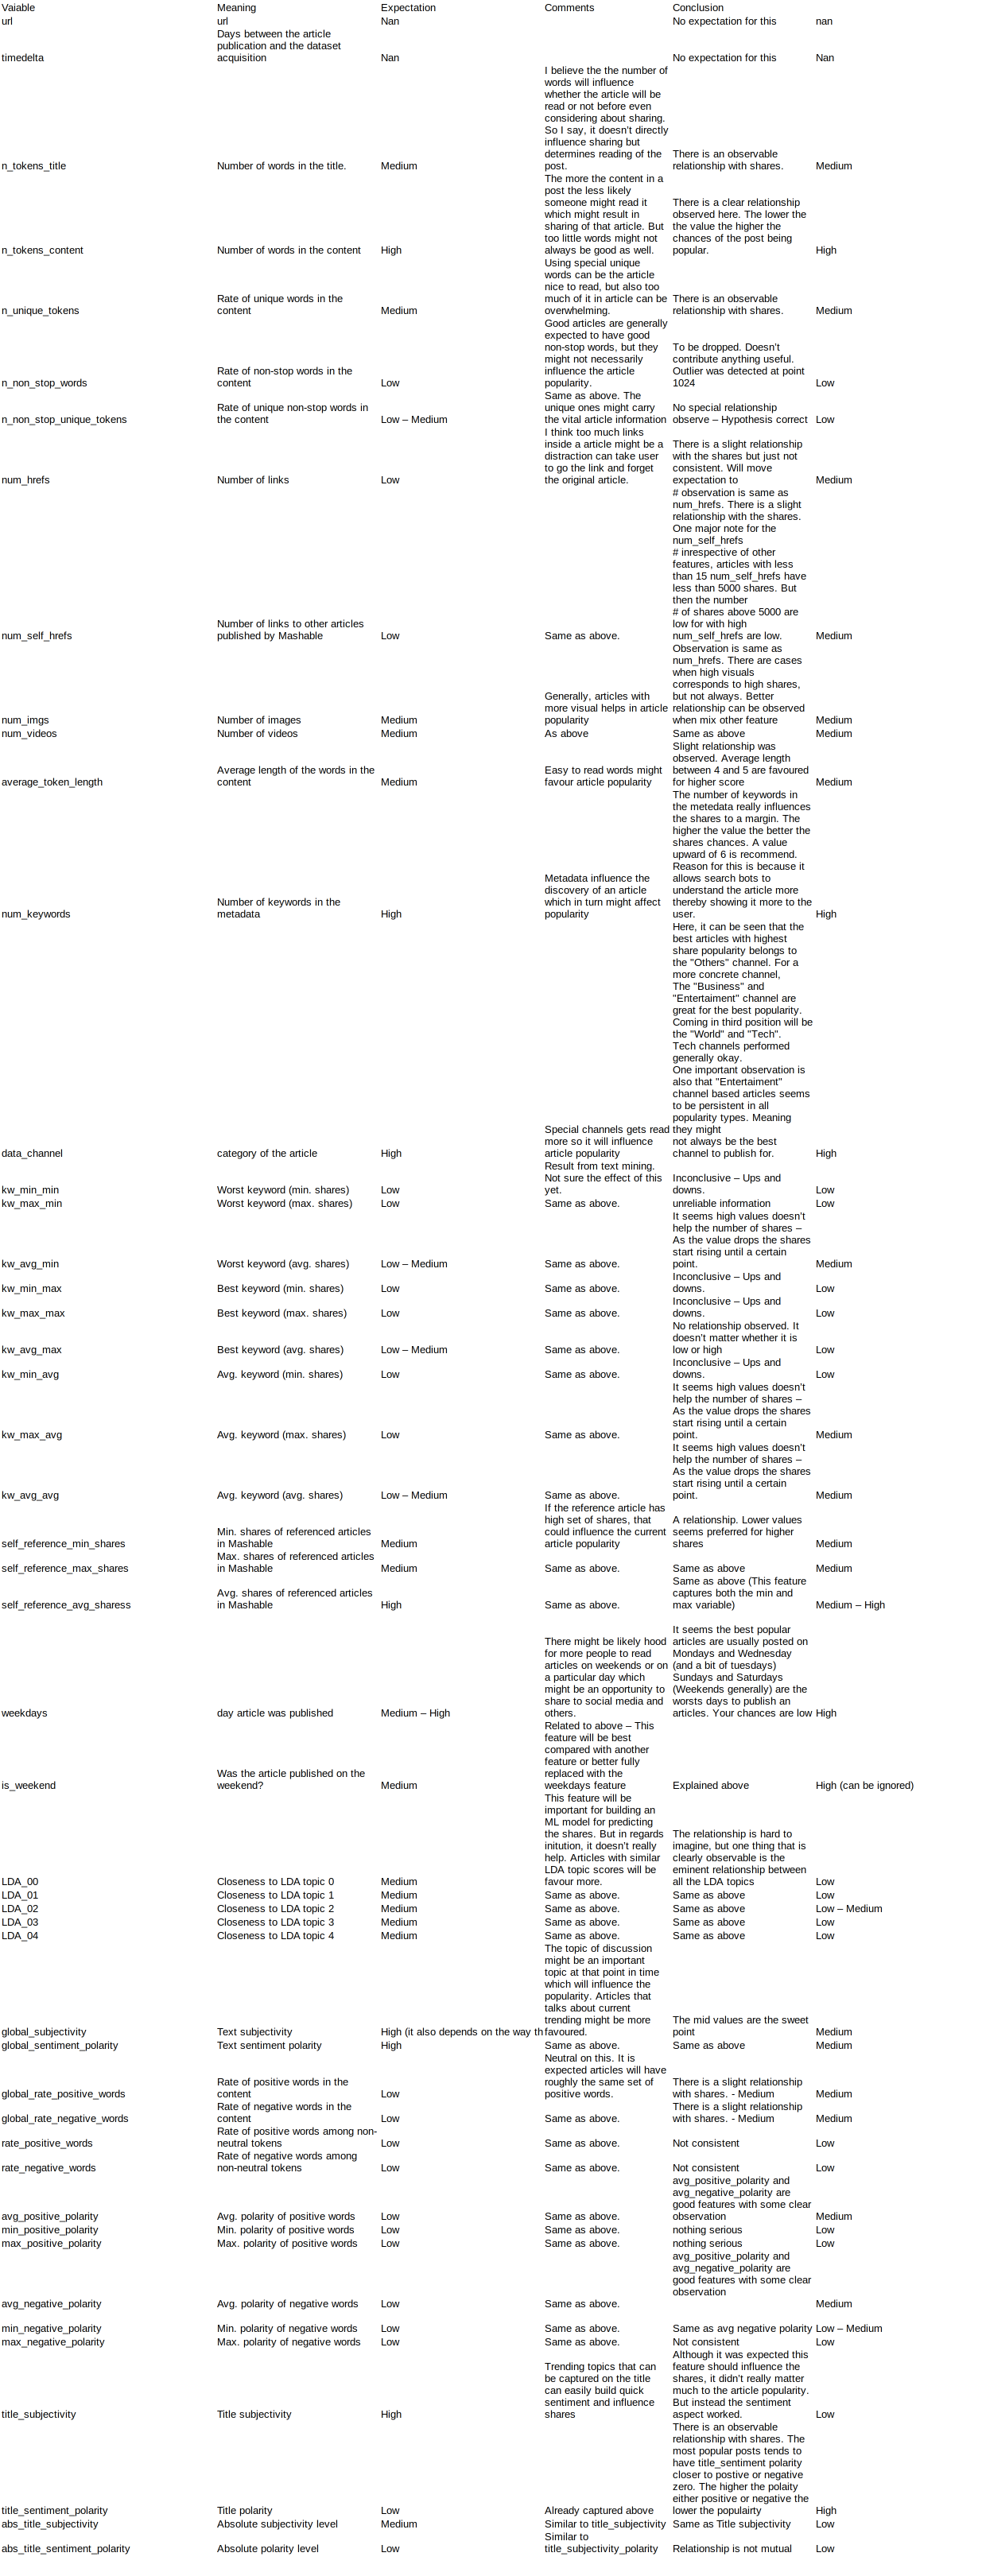